# Final project FDS

In [1]:
from Function import Neural_Network, NaiveBayes
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

## Create the training set and the data set

In [2]:
def createArray(file, size, i):
    image = Image.open(file)
    data = np.array(image).flatten()
    data = np.where(data == 0, data, 1)
    output = np.zeros(size)
    output[i] = 1
    return data, output

In [10]:
# create the 
# https://www.kaggle.com/jidhumohan/mnist-png ==> dataset

training_input = list()
training_output = list()
test_input = list()
test_output = list()
testdir = 'mnist_png/testing/'
trainingdir = 'mnist_png/training/'
size = 10
def loaddata(max1 = 1000000000000):
    training_input = []
    training_output = []
    test_input = []
    test_output = []
    for i in range(size):
        id = 0
        train_directories = os.listdir(trainingdir+str(i))
        test_directories = os.listdir(testdir+str(i))
        for file in train_directories:
            data, output = createArray(trainingdir+str(i)+"/"+file, size,i)
            training_input.append(data)
            training_output.append(output)
            if max1 == id:
                break
            id += 1
            
        for file in test_directories:
            data, output = createArray(testdir+str(i)+"/"+file, size,i)
            test_input.append(data)
            test_output.append(output)
    return training_input, training_output, test_input, test_output
training_input, training_output, test_input, test_output = loaddata()


In [11]:
print(len(training_input))

60000


## Create a NeuralNetwork and train it with the backprog

In [12]:
def createMinibatch(input, output, size):
    minibatchin = list()
    minibatchout = list()
    delta = int(len(input)/10)
    for i in range(int(size/10)):
        index = random.randint(0, delta-1)
        for i in range(10):
            minibatchin.append(input[index+(i*delta)])
            minibatchout.append(output[index+(i*delta)])
    return minibatchin, minibatchout
    

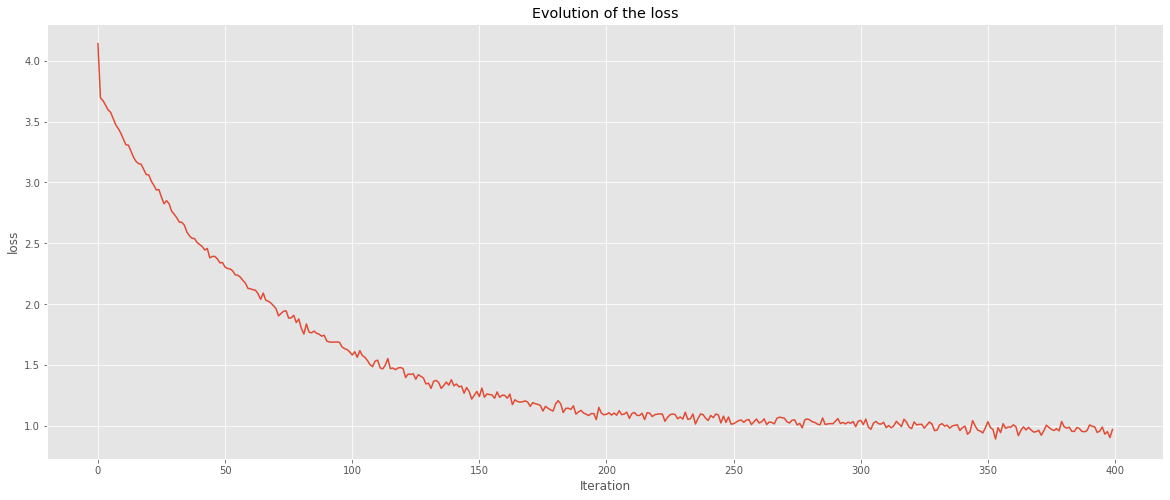

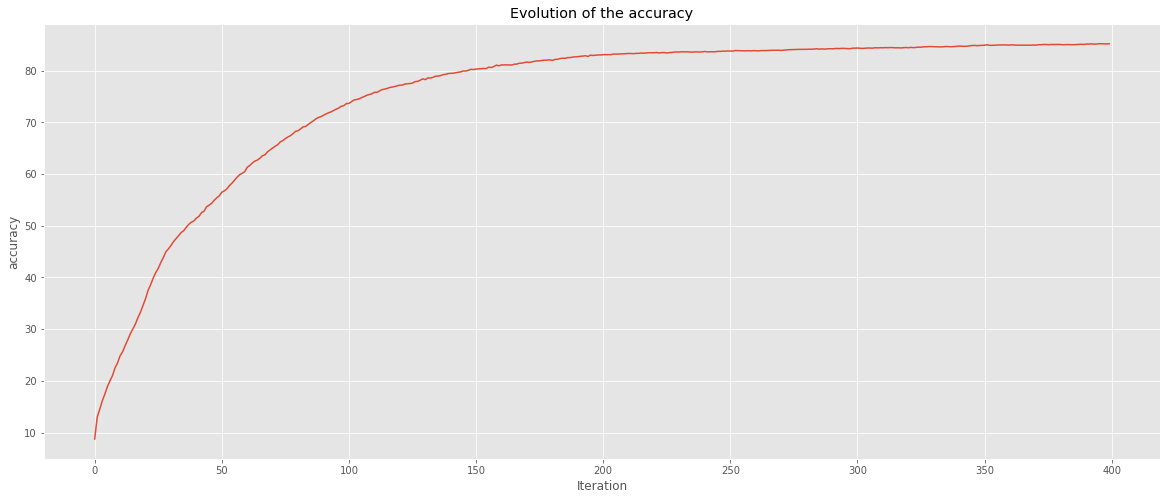

The finale accuracy is : 85.19 %


In [13]:
NN = Neural_Network(28*28, 30, size)
accuracyhist = list()
training_length = 200
for toid in range(training_length):
    minibatchin, minibatchout = createMinibatch(training_input, training_output, 3000)
    NN.training(np.array(minibatchin), np.array(minibatchout), .75, 1)
    accuracyhist.append(NN.accuracy(test_input, test_output))

for toid in range(training_length):
    minibatchin, minibatchout = createMinibatch(training_input, training_output, 3000)
    NN.training(np.array(minibatchin), np.array(minibatchout), .25, 1)
    accuracyhist.append(NN.accuracy(test_input, test_output))
    
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.plot(NN.loss_history)
plt.title('Evolution of the loss')
plt.ylabel('loss')
plt.xlabel('Iteration')
plt.show()

plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.plot(accuracyhist)
plt.title('Evolution of the accuracy')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.show()
finn = NN.accuracy(test_input, test_output)
print('The finale accuracy is :', finn,'%')

In [14]:
NB = NaiveBayes(training_input, training_output)
finb = NB.accuracy(test_input, test_output)
print('The accuracy of Naive Bayes is', finb,'%')

The accuracy of Naive Bayes is 72.95 %


## The accuracy per digit

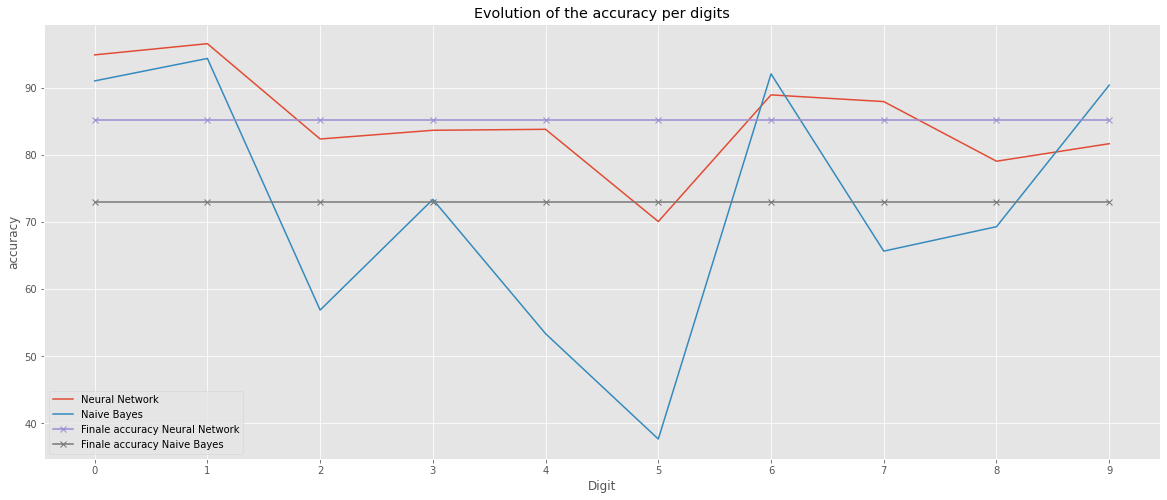

In [16]:
count = np.unique(test_output, axis=0)
digitNN = list()
digitNB = list()
for i in range(10):
    id = [y for y, x in enumerate(test_output) if np.array_equal(x, count[9-i])]
    input = list()
    output = list()
    for j in id:
        input.append(test_input[j]) 
        output.append(test_output[j])
    digitNN.append(NN.accuracy(input, output))
    digitNB.append(NB.accuracy(input, output))


plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.plot(digitNN, label = 'Neural Network')
plt.plot(digitNB, label = 'Naive Bayes') 
plt.plot([finn for i in range(10)], 'x-', label = 'Finale accuracy Neural Network')
plt.plot([finb for i in range(10)], 'x-', label = 'Finale accuracy Naive Bayes')
plt.title('Evolution of the accuracy per digits')
plt.ylabel('accuracy')
plt.xlabel('Digit')
plt.xticks([i for i in range(10)])
plt.legend()
plt.show()

## Evolution of accuracy according to training size

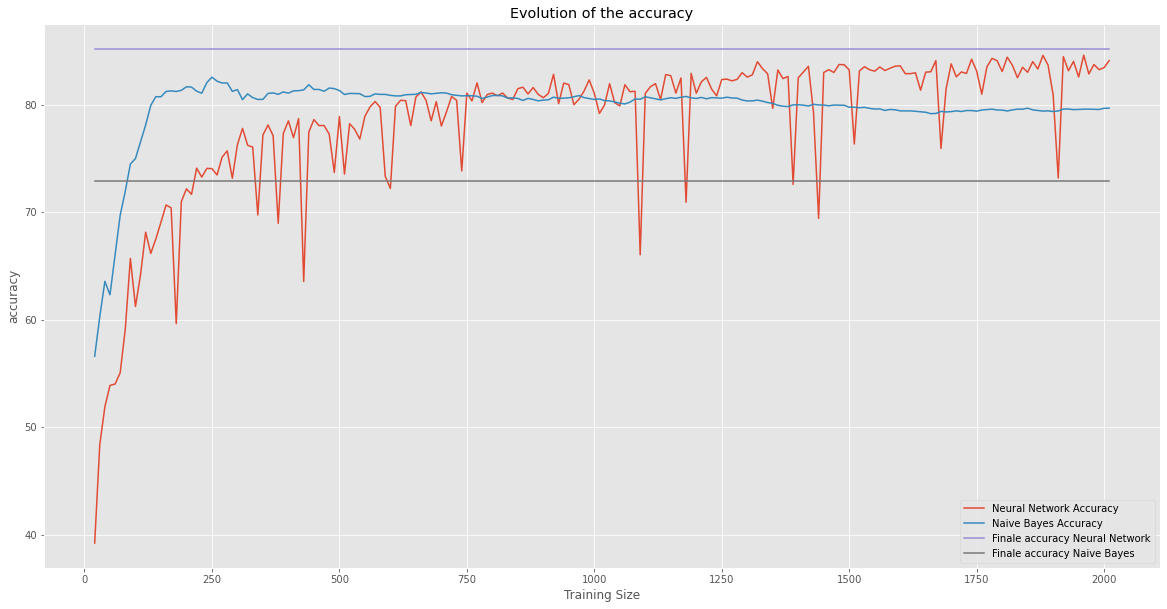

In [18]:
accuracyNN = list()
accuracyNB = list()
xcorr = list()
for i in range(200):
    training_input, training_output, test_input, test_output = loaddata(i+1)
    xcorr.append(len(training_input))
    NN = Neural_Network(28*28, 30, size)
    for toid in range(training_length):
        minibatchin, minibatchout = createMinibatch(training_input, training_output, 3000)
        NN.training(np.array(minibatchin), np.array(minibatchout), .75, 1)
    for toid in range(training_length):
        minibatchin, minibatchout = createMinibatch(training_input, training_output, 3000)
        NN.training(np.array(minibatchin), np.array(minibatchout), .25, 1)
    accuracyNN.append(NN.accuracy(test_input, test_output))
        
    NB = NaiveBayes(training_input, training_output)
    accuracyNB.append(NB.accuracy(test_input, test_output))
        
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(xcorr, accuracyNN, label='Neural Network Accuracy')
plt.plot(xcorr, accuracyNB, label='Naive Bayes Accuracy')
plt.plot(xcorr, [finn for i in range(len(accuracyNN))], '-', label = 'Finale accuracy Neural Network')
plt.plot(xcorr, [finb for i in range(len(accuracyNN))], '-', label = 'Finale accuracy Naive Bayes')

plt.title('Evolution of the accuracy')
plt.ylabel('accuracy')
plt.xlabel('Training Size')
plt.legend()
plt.show()    
    